In [1]:
import tensorflow as tf 
import numpy as np

(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

trainX = trainX / 255.0
testX = testX / 255.0

trainX = trainX.reshape( (trainX.shape[0], 28,28,1) )
testX = testX.reshape( (testX.shape[0], 28,28,1) )

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 901us/step - loss: 0.5000 - acc: 0.8252 - val_loss: 0.4448 - val_acc: 0.8431
Epoch 2/3
1875/1875 [==============================] - 2s 854us/step - loss: 0.3768 - acc: 0.8648 - val_loss: 0.3930 - val_acc: 0.8598
Epoch 3/3
1875/1875 [==============================] - 2s 846us/step - loss: 0.3379 - acc: 0.8771 - val_loss: 0.3910 - val_acc: 0.8603


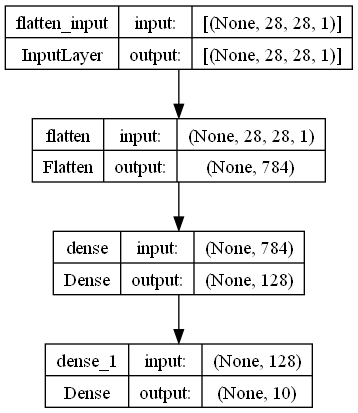

In [2]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

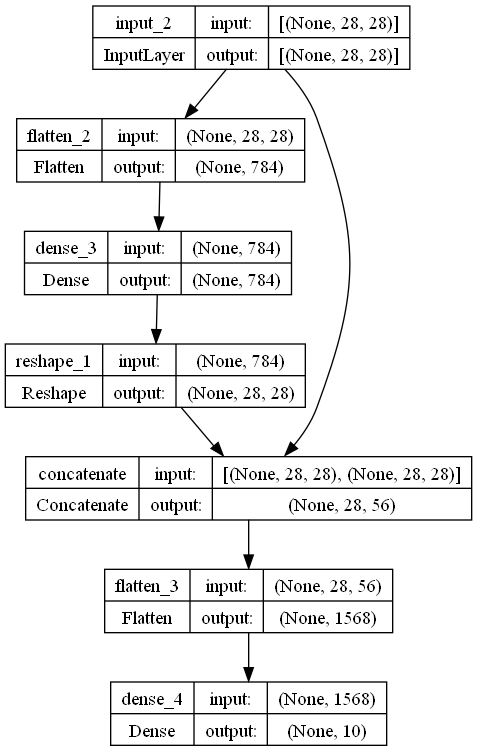

In [4]:
input1 = tf.keras.layers.Input(shape=[28,28])
flatten1 = tf.keras.layers.Flatten()(input1)
dense1 = tf.keras.layers.Dense(28*28, activation='relu')(flatten1)
reshape1 = tf.keras.layers.Reshape((28,28))(dense1)
# 레이어 두개 합치기
concat1 = tf.keras.layers.Concatenate()([input1, reshape1])
flatten2 = tf.keras.layers.Flatten()(concat1)
output = tf.keras.layers.Dense(10, activation='softmax')(flatten2)

model = tf.keras.Model(input1, output)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Conv2D Pooling등 변형 많이하면 원본 까먹을수도
그래서 첫 레이어를 복사해서 중간에 합침